# Amazon Fine Food Reviews 

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The dataset consists of reviews of fine foods from Amazon.

Number of reviews: 568,454 <br>
Number of users: 256,059 <br>
Number of products: 74,258 <br>
Timespan: Oct 1999 - Oct 2012 <br>
Number of Attributes/Columns in data: 10 <br> 

**Attribute Information:**
1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful (YES)
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not (YES+NO)
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sqlite3

In [63]:
db_path='database.sqlite'
conn=sqlite3.connect(db_path)

data=pd.read_sql_query('SELECT * FROM Reviews LIMIT 10000',conn)


In [64]:
def star_rating(l,i):
    rating_list=[]
    for x in l:
        if(x==i):
           rating_list.append(i)
    return rating_list

In [65]:
rating=data['Score']

one_star=star_rating(rating,1)
two_star=star_rating(rating,2)
three_star=star_rating(rating,3)
four_star=star_rating(rating,4)
five_star=star_rating(rating,5)

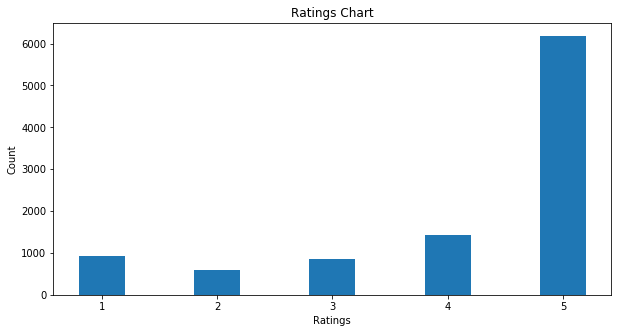

In [66]:
d={1:len(one_star),2:len(two_star),3:len(three_star),4:len(four_star),5:len(five_star)}

x=list(d.keys())
y=list(d.values())

fig=plt.figure(figsize=(10, 5))
plt.bar(x,y,width=0.4)

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Ratings Chart')
plt.show()

In [67]:
data1=pd.read_sql_query('SELECT UserId,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,Text,COUNT(*) FROM Reviews GROUP BY UserId HAVING COUNT(*)>1 LIMIT 10000',conn)
print(data1.shape)

(10000, 9)


In [68]:
distinct_product_id=pd.read_sql_query('SELECT DISTINCT ProductId FROM Reviews LIMIT 10000',conn)
print(len(distinct_product_id))

10000


In [69]:
duplicate_reviews=pd.read_sql_query('SELECT * FROM Reviews GROUP BY UserId,ProductId HAVING COUNT(*)>1 LIMIT 10000',conn)
print(len(duplicate_reviews))
duplicate_reviews

5859


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,239325,B00008DFK5,A102TGNH1D915Z,LINDA Riley,2,3,4,1262131200,Not just for puppies...,"Although the product can be a bit pricey, it c..."
1,258132,B0002DHNXC,A102TGNH1D915Z,LINDA Riley,2,3,4,1262131200,Not just for puppies...,"Although the product can be a bit pricey, it c..."
2,58616,B0009YD7P2,A102TGNH1D915Z,LINDA Riley,2,3,4,1262131200,Not just for puppies...,"Although the product can be a bit pricey, it c..."
3,27840,B000SP1CWW,A102TGNH1D915Z,LINDA Riley,2,3,4,1262131200,Not just for puppies...,"Although the product can be a bit pricey, it c..."
4,389731,B0008IT4OM,A106N4B4EG4DR8,"Monday ""Pamela""",0,0,5,1210118400,Full praise for these delicious morsals that m...,Yummy is all you need to know. Simply deliciou...
5,243906,B000EQT4MA,A106ZCP7RSXMRU,"Lil MamaKitty ""lilbit565""",2,2,5,1200873600,"Unique flavor, excellent healthy snack",We love Garden of Eatin' chips. Our favorites ...
6,224480,B000EQT574,A106ZCP7RSXMRU,"Lil MamaKitty ""lilbit565""",2,2,5,1200873600,"Unique flavor, excellent healthy snack",We love Garden of Eatin' chips. Our favorites ...
7,218747,B000EQT9MK,A106ZCP7RSXMRU,"Lil MamaKitty ""lilbit565""",2,2,5,1200873600,"Unique flavor, excellent healthy snack",We love Garden of Eatin' chips. Our favorites ...
8,410845,B000EQVAFY,A106ZCP7RSXMRU,"Lil MamaKitty ""lilbit565""",2,2,5,1200873600,"Unique flavor, excellent healthy snack",We love Garden of Eatin' chips. Our favorites ...
9,559331,B000EQX57K,A106ZCP7RSXMRU,"Lil MamaKitty ""lilbit565""",2,2,5,1200873600,"Unique flavor, excellent healthy snack",We love Garden of Eatin' chips. Our favorites ...


In [70]:
data2=data1.sort_values('ProductId',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')
print(data2.shape)
data2.head()

(10000, 9)


,UserId,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,Text,COUNT(*)
9952,A1GQUBNRZK3RHI,B00002N8SM,X. Li,0,0,1279411200,1,This product does not work at all. I hang it i...,2
5561,A196AJHU9EASJN,B00002NCJC,Alex Chaffee,0,0,1282953600,4,Why is this $[...] when the same product is av...,2
2319,A13RRPGE79XFFH,B00002NCJC,reader48,0,0,1281052800,5,We have used the Victor fly bait for 3 seasons...,2
3414,A15N6S5GN8NHM7,B00004RAMY,L. Paul Joseph,0,0,1341878400,5,I'm looking forward to using this trap on a il...,2
9588,A1G65L9BLQ4R9W,B00004RBDW,tbrochny,0,1,1279152000,5,I've just installed the third unit in our gara...,3


In [71]:
data3=data2.drop_duplicates(subset={"UserId","ProductId","ProfileName","HelpfulnessNumerator","HelpfulnessDenominator","Time","Score","Text"}, keep='first', inplace=False)
print(data3.shape)

(10000, 9)


In [72]:
helpfullness=pd.read_sql_query('SELECT * FROM Reviews WHERE HelpfulnessNumerator>HelpfulnessDenominator LIMIT 10000',conn)
helpfullness.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
1,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [73]:
data4=data3[data3['HelpfulnessNumerator']<=data3['HelpfulnessDenominator']]
data4.head()

,UserId,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score,Text,COUNT(*)
9952,A1GQUBNRZK3RHI,B00002N8SM,X. Li,0,0,1279411200,1,This product does not work at all. I hang it i...,2
5561,A196AJHU9EASJN,B00002NCJC,Alex Chaffee,0,0,1282953600,4,Why is this $[...] when the same product is av...,2
2319,A13RRPGE79XFFH,B00002NCJC,reader48,0,0,1281052800,5,We have used the Victor fly bait for 3 seasons...,2
3414,A15N6S5GN8NHM7,B00004RAMY,L. Paul Joseph,0,0,1341878400,5,I'm looking forward to using this trap on a il...,2
9588,A1G65L9BLQ4R9W,B00004RBDW,tbrochny,0,1,1279152000,5,I've just installed the third unit in our gara...,3
